## Imports

In [1]:
import copy
import numpy as np
import pandas as pd
import multiprocessing
import matplotlib.pyplot as plt

import defs
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from collections import Counter
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

## Loading Dataset

In [2]:
n_features = 9

In [3]:
dataset = pd.read_csv("Resources/glass.scale.txt", header=None)

In [4]:
dataset.head()

,0
0,1 1:-0.134323 2:-0.124812 3:1 4:-0.495327 5:-0...
1,1 1:-0.432839 2:-0.0496238 3:0.603564 4:-0.333...
2,1 1:-0.55838 2:-0.157895 3:0.581292 4:-0.22118...
3,1 1:-0.428443 2:-0.254135 3:0.643653 4:-0.3769...
4,1 1:-0.449511 2:-0.23609 3:0.612472 4:-0.4081 ...


In [5]:
dataset.shape #, dataset_test.shape

(214, 1)

In [6]:
def get_dataset(dataset):
    X = []
    y = []

    for idx, i in enumerate(dataset[0]):
        k = [0] * n_features
        p = i.strip().split(" ")
        y.append(int(p[0]))
        for j in p[1:]:
            k[int(j.split(":")[0])-1] = float(j.split(":")[1])
        X.append(k)
    return np.array(X), np.array(y)

In [7]:
X, y = get_dataset(dataset)
y -= 1

In [8]:
n_classes = np.unique(y).shape[0]

In [9]:
X.shape, y.shape

((214, 9), (214,))

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Required Methods

In [11]:
def get_support_vectors(X, y, svm):    
    X_support_vecs = []
    y_support_vecs = []
    for i in svm.support_:
        X_support_vecs.append(X[i].tolist())
        y_support_vecs.append(y[i].tolist())
    return X_support_vecs, y_support_vecs

In [12]:
def plot_tsne(X, y):
    tsne = TSNE(n_components=2, random_state=0)
    k = tsne.fit_transform(X)
    plt.scatter(k[:, 0], k[:, 1], c=y)
    plt.show()

## Analysis

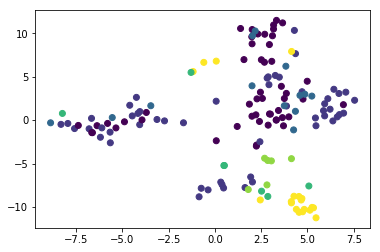

In [13]:
plot_tsne(X_train, y_train)

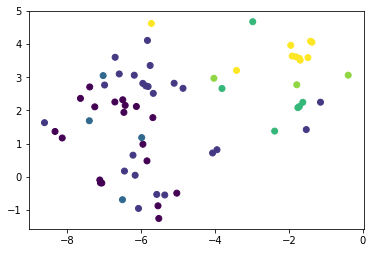

In [14]:
plot_tsne(X_test, y_test)

# Baselines

In [15]:
svm = SVC(gamma='auto')
svm.fit(X_train, y_train)
print(svm.score(X_train, y_train))
print(svm.score(X_test, y_test))

0.6644295302013423
0.6153846153846154


# Online Learning

### Fitting the data with 60% data and then feeding the data points incrementally

In [16]:
X_init, X_incr, y_init, y_incr = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

In [17]:
X_init.shape, X_incr.shape

((104, 9), (45, 9))

In [18]:
svm = SVC(gamma='auto')
svm.fit(X_init, y_init)
print(svm.score(X_init, y_init))
print(svm.score(X_test, y_test))

0.5192307692307693
0.5230769230769231


In [19]:
X_support_vecs, y_support_vecs = get_support_vectors(X_init, y_init, svm)
X_prev = np.copy(X_init)
y_prev = np.copy(y_init)

for X, y in zip(X_incr, y_incr):
    np.concatenate([X_prev, X.reshape((1, 9))], axis=0)
    np.concatenate([y_prev, [y]], axis=0)
    if svm.score([X], [y]) == 0:
        X_support_vecs_new = X_support_vecs + [X.tolist()]
        y_support_vecs_new = y_support_vecs + [y.tolist()]
        svm = SVC(gamma='auto')
        svm.fit(np.array(X_support_vecs_new), np.array(y_support_vecs_new))
        print("Train Acc:", svm.score(X_prev, y_prev), "\tTest Acc:", svm.score(X_test, y_test))
        X_support_vecs, y_support_vecs = get_support_vectors(np.array(X_support_vecs_new), np.array(y_support_vecs_new), svm)

Train Acc: 0.5480769230769231 	Test Acc: 0.5538461538461539
Train Acc: 0.5384615384615384 	Test Acc: 0.6153846153846154
Train Acc: 0.5576923076923077 	Test Acc: 0.5384615384615384
Train Acc: 0.5288461538461539 	Test Acc: 0.6153846153846154
Train Acc: 0.5576923076923077 	Test Acc: 0.5384615384615384
Train Acc: 0.5576923076923077 	Test Acc: 0.5384615384615384
Train Acc: 0.5192307692307693 	Test Acc: 0.5230769230769231
Train Acc: 0.5096153846153846 	Test Acc: 0.5076923076923077
Train Acc: 0.5384615384615384 	Test Acc: 0.5384615384615384
Train Acc: 0.4807692307692308 	Test Acc: 0.5384615384615384
Train Acc: 0.5769230769230769 	Test Acc: 0.6
Train Acc: 0.4807692307692308 	Test Acc: 0.5230769230769231
Train Acc: 0.4807692307692308 	Test Acc: 0.5230769230769231
Train Acc: 0.5865384615384616 	Test Acc: 0.6
Train Acc: 0.5961538461538461 	Test Acc: 0.6153846153846154
